In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import sklearn.metrics as metrics
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df

,CAR_NAME,MODEL,NO_OF_YEARS,DEALER,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
0,Audi A4 2.0T Premium Plus,2018,3,The Audi Exchange,43152,4.8,654,29587
1,Audi Q5 3.0T Premium Plus,2016,5,Fletcher Jones Audi,32666,4.8,1048,31881
2,Audi S5 3.0 Prestige quattro,2012,9,Volkswagen of Downtown Chicago,28552,4.6,1442,29000
3,Audi Q3 45 S line Premium,2019,0,Volkswagen of Downtown Chicago,16027,4.6,1442,39000
4,Audi Q5 2.0T Premium Plus,2014,7,Toyota of Lincoln Park,64698,4.2,216,20900
...,...,...,...,...,...,...,...,...
682,Audi S4 3.0T Premium Plus,2014,7,Adam Auto Group,100495,4.6,1074,20885
683,Audi A5 2.0T Premium Plus,2013,8,Guaranteed Motor Cars,74437,4.7,2096,24900
684,Audi S5 4.2 Premium Plus quattro,2011,10,Coda Motors,100495,4.2,55,16990
685,Audi Q7 55 Prestige,2019,2,Audi Morton Grove,48335,4.8,630,52999


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CAR_NAME       687 non-null    object 
 1   MODEL          687 non-null    int64  
 2   NO_OF_YEARS    687 non-null    int64  
 3   DEALER         687 non-null    object 
 4   MILES_DRIVEN   687 non-null    int64  
 5   RATE           687 non-null    float64
 6   NO_OF_REVIEWS  687 non-null    int64  
 7   PRICE          687 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 43.1+ KB


In [5]:
df.head()

,CAR_NAME,MODEL,NO_OF_YEARS,DEALER,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
0,Audi A4 2.0T Premium Plus,2018,3,The Audi Exchange,43152,4.8,654,29587
1,Audi Q5 3.0T Premium Plus,2016,5,Fletcher Jones Audi,32666,4.8,1048,31881
2,Audi S5 3.0 Prestige quattro,2012,9,Volkswagen of Downtown Chicago,28552,4.6,1442,29000
3,Audi Q3 45 S line Premium,2019,0,Volkswagen of Downtown Chicago,16027,4.6,1442,39000
4,Audi Q5 2.0T Premium Plus,2014,7,Toyota of Lincoln Park,64698,4.2,216,20900


# Feature Engineering

In [6]:
df.corr()

,MODEL,NO_OF_YEARS,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
MODEL,1.000000,-0.990396,-0.746628,0.005050,0.022436,0.813331
NO_OF_YEARS,-0.990396,1.000000,0.768762,-0.006688,-0.014742,-0.823697
MILES_DRIVEN,-0.746628,0.768762,1.000000,0.012953,-0.060516,-0.814461
RATE,0.005050,-0.006688,0.012953,1.000000,0.124990,-0.007720
NO_OF_REVIEWS,0.022436,-0.014742,-0.060516,0.124990,1.000000,-0.014729
PRICE,0.813331,-0.823697,-0.814461,-0.007720,-0.014729,1.000000


#### Drop 'DEALER'

In [7]:
df.drop(columns=['DEALER'],inplace=True)

#### Drop 'MODEL'

In [8]:
df.drop(columns=['MODEL'],inplace=True)

#### Convert 'CAR_NAME' Into a Dummy Variable

In [9]:
df['CAR_NAME'].value_counts().sort_values(ascending=False)

Audi Q5 2.0T Premium Plus        45
Audi A4 2.0T Premium Plus        33
Audi Q7 3.0T Premium Plus        23
Audi A3 2.0T Premium             23
Audi A4 2.0T Premium             21
                                 ..
Audi A6 3.0T Premium quattro      1
Audi S6 4.0T Premium Plus         1
Audi RS Q8 4.0T quattro           1
Audi TTS 2.0T Premium quattro     1
Audi A4 2.0T quattro              1
Name: CAR_NAME, Length: 160, dtype: int64

In [10]:
pd.get_dummies(df, drop_first=True)

,NO_OF_YEARS,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE,CAR_NAME_Audi A3 2.0 TDI Premium,CAR_NAME_Audi A3 2.0 TDI Premium Plus,CAR_NAME_Audi A3 2.0 TDI Prestige,CAR_NAME_Audi A3 2.0T Premium,CAR_NAME_Audi A3 2.0T Premium Plus,...,CAR_NAME_Audi TT RS 2.5T,CAR_NAME_Audi TTS 2.0T Premium quattro,CAR_NAME_Audi TTS 2.0T Prestige quattro,CAR_NAME_Audi TTS 2.0T quattro,CAR_NAME_Audi allroad 2.0T Premium Plus,CAR_NAME_Audi allroad 2.0T Premium Plus quattro,CAR_NAME_Audi allroad 2.0T Premium quattro,CAR_NAME_Audi e-tron Premium,CAR_NAME_Audi e-tron Premium Plus,CAR_NAME_Audi e-tron Prestige
0,3,43152,4.8,654,29587,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,32666,4.8,1048,31881,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,28552,4.6,1442,29000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,16027,4.6,1442,39000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,64698,4.2,216,20900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,7,100495,4.6,1074,20885,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,8,74437,4.7,2096,24900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
684,10,100495,4.2,55,16990,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685,2,48335,4.8,630,52999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.columns

Index(['CAR_NAME', 'NO_OF_YEARS', 'MILES_DRIVEN', 'RATE', 'NO_OF_REVIEWS',
       'PRICE'],
      dtype='object')

# Modeling

In [12]:
#Tr = Te (low) -- underfit
#Tr = Te (high) -- good fit
#Tr > Te -- overfit
#Tr < Te -- outliers

### Split Data

In [13]:
#Separate our features from our target(train and test)
x = df.drop(columns=['PRICE','CAR_NAME']) #features
y = df['PRICE'] #target

X, X_test, Y, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

### 1- Linear simple Regression

In [14]:
# Fit a simple linear regression on training and val
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f'Linear Regression Train R^2 score was: {lr.score(X_train,y_train):.5f}')  
print(f'Linear Regression Validation R^2 score was: {lr.score(X_val,y_val) :.5f}')

Linear Regression Train R^2 score was: 0.76114
Linear Regression Validation R^2 score was: 0.74205


### 2- Linear Regression with Polynomial

In [15]:
#Feature transforms for train and val so, that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 Polynomial Regression Train R^2 score was: {lm_poly.score(X_train_poly, y_train):.5f}')
print(f'Degree 2 Polynomial Regression Validation R^2 score was: {lm_poly.score(X_val_poly, y_val):.5f}')

Degree 2 Polynomial Regression Train R^2 score was: 0.77348
Degree 2 Polynomial Regression Validation R^2 score was: 0.73379


### KFOLD

In [16]:
x = df.drop(columns=['PRICE','CAR_NAME']) #features
y = df['PRICE'] #target

X, X_test, Y, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

#this helps with the way kf will generate indices below
x1, y1 = np.array(X), np.array(Y)

### 3- Ridge Regression

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state = 0)

for train_ind, val_ind in kf.split(x1,y1):
    
    X_train, y_train = x1[train_ind], y1[train_ind]
    X_val, y_val = x1[val_ind], y1[val_ind] 
    
    lm_reg = Ridge(alpha=1)
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)

print(f'Ridge Regression Train R^2 score was: {lm_reg.score(X_train_scaled, y_train):.5f}')
print(f'Ridge Regression Validation R^2 score was: {lm_reg.score(X_val_scaled, y_val):.5f}')

Ridge Regression Train R^2 score was: 0.75584
Ridge Regression Validation R^2 score was: 0.75785


### 4- Lasso Regression

In [18]:
CV_flag = True
alphavec = [0.1,0.01, 0.001]    
kf = KFold(n_splits=5, shuffle=True, random_state = 0) 

if CV_flag is True:
    m = LassoCV(alphas = alphavec, cv = 5)
    m.fit(X_train, y_train)
else:
    m = Lasso(alpha = 1) 
    m.fit(X_train, y_train)

    valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
    
print(f'Lasso Regression Train R^2 score was: {m.score(X_train,y_train):.5f}')
print(f'Lasso Regression Validation R^2 score was: {m.score(X_val, y_val):.5f}')

Lasso Regression Train R^2 score was: 0.75584
Lasso Regression Validation R^2 score was: 0.75771


### 5- Linear CV

In [19]:
# Notice that we are splitting the X_train data into 5 Folds
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)

# Build the Model
lin_reg_est.fit(X_train, y_train)
print(f'Linear CV Regression Train R^2 score was: {lin_reg_est.score(X_train, y_train):.5f}')
print(f'Linear CV Regression Validation R^2 score was: {lin_reg_est.score(X_val, y_val):.5f}')

Linear CV Regression Train R^2 score was: 0.75584
Linear CV Regression Validation R^2 score was: 0.75770


## Best Model

In [20]:
#test the choosen model(Ridge Regression)
lm_reg_best = Ridge(alpha=1)
lm_reg_best.fit(X_train, y_train)

print(f'Test R^2 score was: {r2_score(y_test, lm_reg_best.predict(X_test)):.5f}')

Test R^2 score was: 0.77345


In [21]:
X_train, X_holdout, y_train, y_holdout = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
lm_reg.fit(X_train, y_train)
y_pred_train=lm_reg.predict(X_train)
y_pred_val=lm_reg.predict(X_val)
y_pred_test=lm_reg.predict(X_test)

## MSE, RMSE, MAE and R2

### For Validation Data

In [23]:
MSE = mean_squared_error(y_pred_val, y_val, squared=True)
print('Mean Square Error = ', MSE)

RMSE = mean_squared_error(y_pred_val,y_val, squared=False)
print ('Root Mean Square Error =', RMSE)

MAE = mean_absolute_error(y_pred_val,y_val)
print ('Mean Absoluter Error=', MAE)

r_square = r2_score(y_pred_val,y_val)
print ('The R square Error=', r_square)

Mean Square Error =  38609913.35400662
Root Mean Square Error = 6213.687580978514
Mean Absoluter Error= 5175.960996720639
The R square Error= 0.729045517533306


## Evaluating Ridge Regression Model

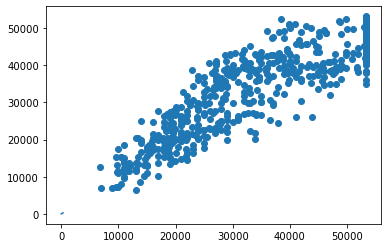

In [24]:
# Fitted vs. Actual
y_train_pred = lm_reg.predict(X_test)

plt.scatter(y_train, y_pred_train, alpha=1)
plt.plot([0, 300], [0, 300])

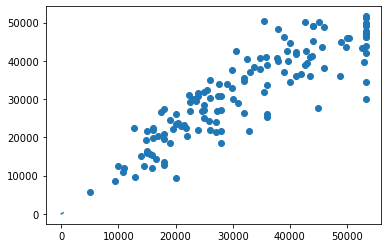

In [25]:
# Fitted vs. Actual
y_test_pred = lm_reg.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.plot([0, 300], [0,300])

Text(0.5, 1.0, 'Residuals vs. Predictions')

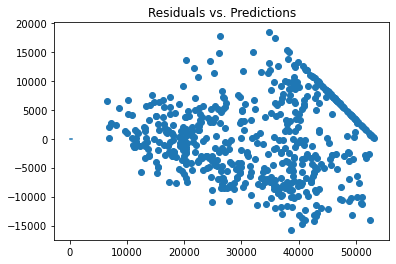

In [26]:
# Plot Residuals vs. predicted

lm_reg_residuals = y_train - y_pred_train

plt.scatter(y_pred_train, lm_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")

C:\Users\Rahaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


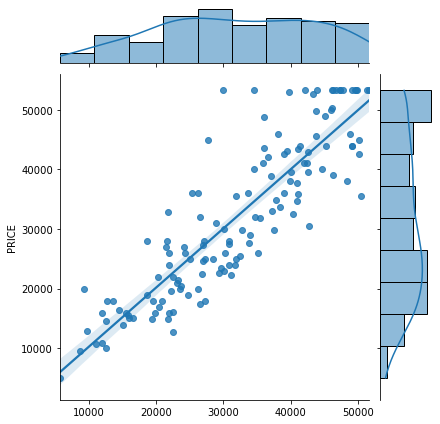

In [28]:
sns.jointplot(y_test_pred, y_holdout, kind='reg')

C:\Users\Rahaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


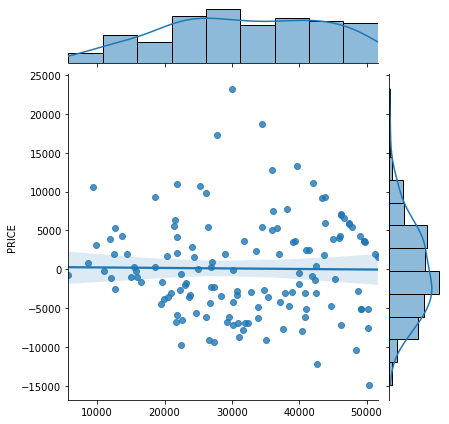

In [30]:
sns.jointplot(y_test_pred, y_holdout - y_test_pred, kind='reg')

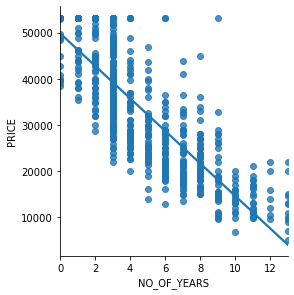

In [32]:
sns.lmplot(x="NO_OF_YEARS" , y="PRICE" , ci= None, data =df , height=4)

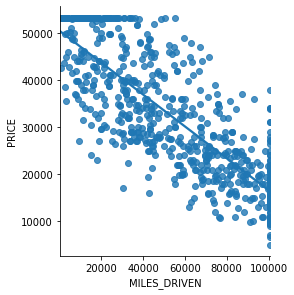

In [33]:
sns.lmplot(x="MILES_DRIVEN" , y="PRICE" , ci= None, data =df , height=4)